# Problem
It is said that the expected frequency of earthquakes decreases multiplicatively with their magnitude. The formula is $log_{10}N = a-bM$ where $N$ is the expected number of earthquakes of magnitude $M$. Since the response variable is count, Poisson regression will be used to tackle this problem.

We can see that $E[Y|X] = e^{\beta_0 + \beta_1 x}$


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

In [2]:
def fetch_dataset():
    return pd.read_csv(os.path.join('dataset', 
    'EarthquakeMagnitudes.txt'), delimiter=' ')

In [3]:
df = fetch_dataset()
df.head()

,Locn,Magnitude,Freq
0,SC,2.75,9471
1,SC,3.25,2784
2,SC,3.75,912
3,SC,4.25,285
4,SC,4.75,90


## Explanatory Analysis

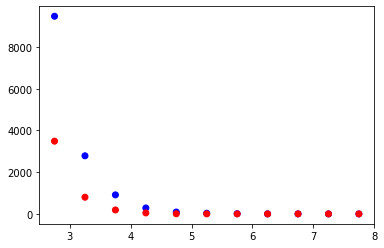

In [4]:
# Make sure X and y are of dataframe, not series
X, y = df[['Magnitude', 'Locn']], df['Freq']
# mapping colours to each category.
colours = {'WA': 'red', 'SC': 'blue'}
plt.scatter(X[['Magnitude']], y, c=np.array(df['Locn'].map(colours)))
plt.show()

The number of earthquakes seems to decrease multiplicatively. It seems to be higher at location SC compared to WA.

## Fit a descritive model

In [5]:

poisson_model = smf.glm(formula='Freq ~ Magnitude * C(Locn)', data=df, family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Freq   No. Observations:                   22
Model:                            GLM   Df Residuals:                       18
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60.207
Date:                Thu, 13 May 2021   Deviance:                       17.980
Time:                        17:01:12   Pearson chi2:                     44.9
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  15.5985      0.064    243.975      0.000      15.473      15.724
C(Locn)[T.WA]               0.5561      0.152      3.667      0.000       0.259       0.853
Magnitude                  -2.3461      0.021   -110.126      0.000      -2.388      -2.304
Magnitude:C(Locn)[T.WA]    -0.5632      0.052    -10.895      0.000      -0.665      -0.462
===========================================================================================
"""

Degree of freedom is very close to deviance of residuals. This means that poisson model is appropriate. 

In [6]:
conf = poisson_model.conf_int()
conf_SC = conf.iloc[2]
conf_WA = conf.iloc[2] + conf.iloc[3]
print((np.exp(conf_SC) -1) * 100)
print((np.exp(conf_WA) -1) * 100)

0   -90.816905
1   -90.017116
Name: Magnitude, dtype: float64
0   -95.275183
1   -93.709876
dtype: float64


The average number of earth quakes in SC seems to decrease by around between 90% and 90.8% for every magnitude increase. At the same time, the average number of earth quakes in WA decreases by around 93% and 95%.